In [43]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [91]:
variances = np.array([0.1, 1, 5])
gammas = np.array([0.2, 0.8, 0.95])
ns = np.linspace(50, 2000, 50)
count = 1000

In [92]:
def calc_first_length(xs: np.array, gamma: float) -> float:
    sum_sq = np.sum(np.square(xs))
    n = xs.size
    left_quantile = scipy.stats.chi2.ppf((1 + gamma) / 2, n)
    right_quantile = scipy.stats.chi2.ppf((1 - gamma) / 2, n)
    return sum_sq * (1 / right_quantile - 1 / left_quantile)

In [93]:
def calc_second_length(xs: np.array, gamma: float) -> float:
    mean_sq = np.mean(xs) ** 2
    n = xs.size
    left_quantile = scipy.stats.norm.ppf((3 + gamma) / 4) ** 2
    right_quantile = scipy.stats.norm.ppf((3 - gamma) / 4) ** 2
    return n * mean_sq * (1 / right_quantile - 1 / left_quantile)

In [94]:
def generate_xs(n: int, variance: float) -> np.array:
    return np.random.normal(0, variance, n)

In [95]:
def calc_two_mean(n: int, variance: float, gamma: float, count: int) -> (float, float):
    firsts = []
    seconds = []
    for iteration in range(count):
        xs = generate_xs(n, variance)
        firsts.append(calc_first_length(xs, gamma))
        seconds.append(calc_second_length(xs, gamma))
    return np.mean(np.array(firsts)), np.mean(np.array(seconds))

In [99]:
def prepare_plot(variance: float, gamma: float):
    plt.xlabel('Number of samples')
    plt.ylabel('Length of interval')
    plt.title(f'Variance={variance}, gamma={gamma}')

def build_plot(ns: np.array, variance: float, gamma: float):
    prepare_plot(variance, gamma)
    firsts = []
    seconds = []
    for n in ns:
        first, second = calc_two_mean(int(n), variance, gamma, count)
        firsts.append(first)
        seconds.append(second)
    plt.plot(ns, firsts)
    plt.plot(ns, seconds)
    plt.legend(['First statistics', 'Second statistics'])
    plt.show()

    prepare_plot(variance, gamma)
    plt.plot(ns, firsts)
    plt.legend(['First statistics'])
    plt.show()

Из-за того, что длина второго подхода сильно больше длины первого, под каждым графиком сравнения есть еще отдельный график длины первого подхода.

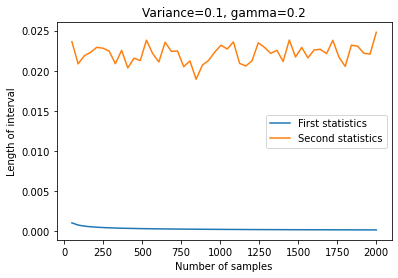

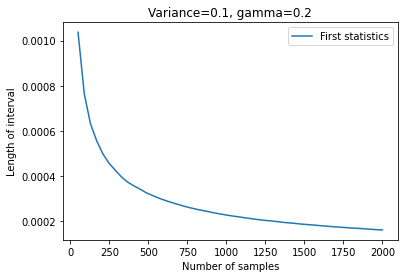

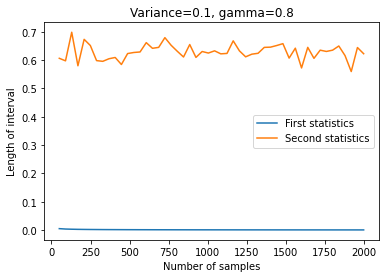

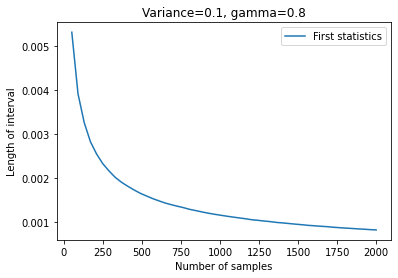

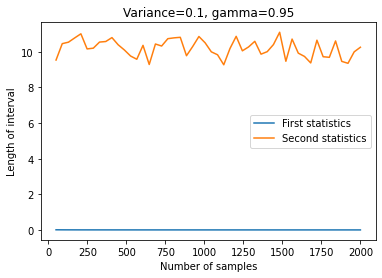

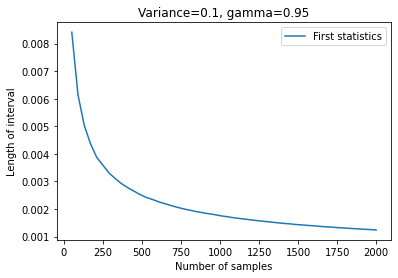

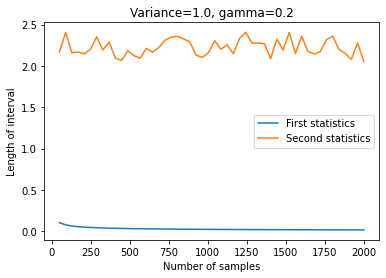

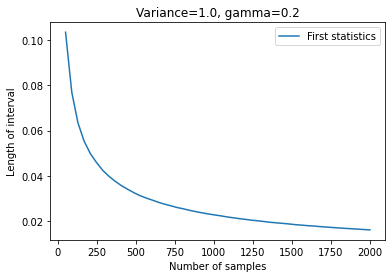

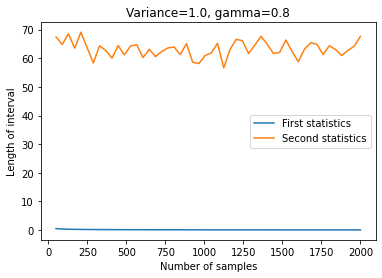

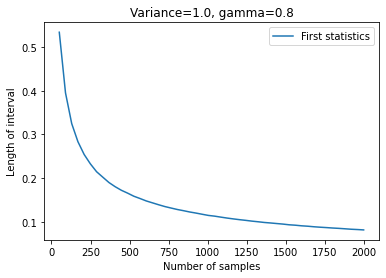

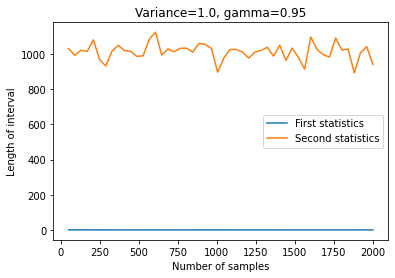

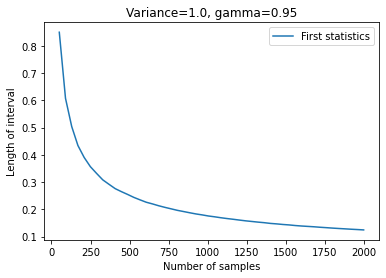

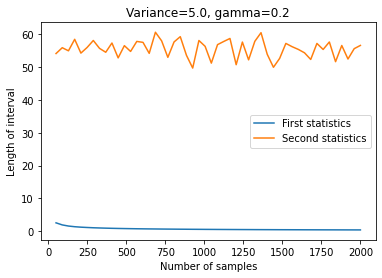

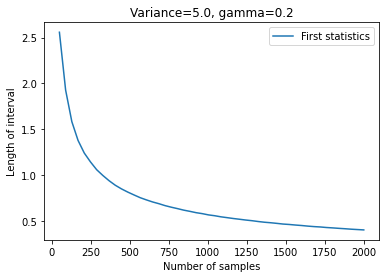

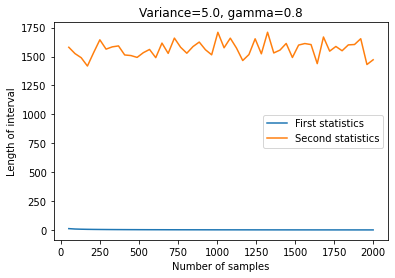

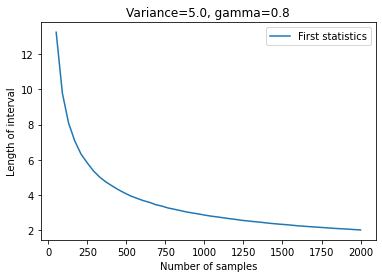

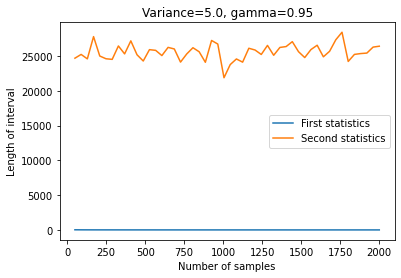

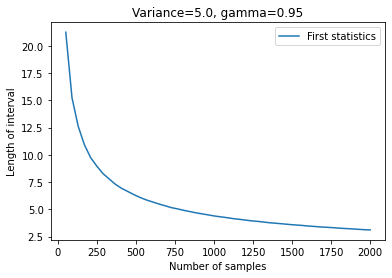

In [97]:
for variance in variances:
    for gamma in gammas:
        build_plot(ns, variance, gamma)

Длина интервала в первом подходе стремительно убывает при увеличении $n$. Можно заметить, что вид убывания не зависит от значений $gamma$ и $variance$.

В то же время длина интервала при использовании второй статистики при фиксированных $gamma$ и $variance$ колеблется около одного значения.

Очевидно, что первое лучше второго, потому что во втором слишком большая длина интервала и это нам не дает никакой оценки. Длина же первого интервала убывает, что дает нам неплохую оценку.